In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import re
import warnings
import random
import matplotlib
from tqdm.notebook import tqdm
from matplotlib.patches import Patch
from scipy.stats import linregress, spearmanr
import analysis_utils 
from copy import deepcopy
import importlib

# path to repository folder (data is stored here as well)
path = '..'
preds_loc = os.path.join(path, 'data', 'analysis', 's461_analysis.csv')

# default plotting settings
font = {'size'   : 18}
matplotlib.rc('font', **font)

# notebook display options
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 300

remap_names = analysis_utils.remap_names
remap_names_2 = analysis_utils.remap_names_2

db = pd.read_csv(preds_loc).set_index(['uid', 'uid2'])

Original unique mutations: 461
['K1566_pslm_rfa_1_dir', 'K1566_pslm_rfa_2_dir', 'K1566_pslm_rfa_3_dir', 'K1566_pslm_rfa_4_dir', 'K1566_pslm_rfa_5_dir', 'K1566_pslm_rfa_6_dir', 'K1566_pslm_rfa_7_dir', 'K1566_pslm_rfa_8_dir', 'K1566_pslm_rfa_9_dir', 'K1566_pslm_rfa_10_dir', 'K1566_pslm_rfa_11_dir']
['KORPM_dir', 'CartddgD_dir', 'FoldXD_dir', 'EvoD_dir', 'DDGunD_dir', 'ACDCNND_dir', 'MAESTRO_dir', 'FoldX_dir', 'PremPS_dir', 'mCSM_dir', 'SDM_dir', 'DUET_dir', 'I-Mutant3.0_dir', 'I-Mutant3.0-Seq_dir', 'MuPro_dir', 'SAAFEC-Seq_dir', 'DDGun3D_dir', 'DDGun_dir', 'ACDC-NN-Seq_dir', 'ACDC-NN_dir', 'PremPS_inv', 'MAESTRO_inv', 'FoldX_inv', 'mCSM_inv', 'SDM_inv', 'DUET_inv', 'I-Mutant3.0_inv', 'I-Mutant3.0-Seq_inv', 'MuPro_inv', 'SAAFEC-Seq_inv', 'INPS-Seq_dir', 'INPS3D_dir', 'INPS-Seq_inv', 'INPS3D_inv', 'PopMusic_dir', 'PopMusic_inv', 'ThermoNet_dir', 'ThermoNet_inv', 'ACDC-NN-Seq_inv', 'ACDC-NN_inv', 'DDGun_inv', 'DDGun3D_inv', 'msa_transformer_median_dir', 'msa_transformer_mean_dir', 'esmif_mu

,,KORPM_dir,EvoD_dir,MAESTRO_dir,FoldX_dir,PremPS_dir,mCSM_dir,SDM_dir,DUET_dir,I-Mutant3.0_dir,I-Mutant3.0-Seq_dir,...,K1566_pslm_rfa_7_dir,K1566_pslm_rfa_8_dir,K1566_pslm_rfa_9_dir,K1566_pslm_rfa_10_dir,K1566_pslm_rfa_11_dir,ddG_dir,cluster,mpnn_rosetta_dir,random_dir,ddG
uid,uid2,,,,,,,,,,,,,,,,,,,,,
1A0F_11A,1A0F_11A,0.138,-0.37,-0.761365,0.551703,-0.44,-0.970,1.43,-0.466,-0.90,-0.65,...,-0.885503,-0.820124,-0.820124,-0.820124,-0.819380,-1.800,15,0.143792,0.698312,-1.800
1BA3_461D,1BA3_457D,-1.065,-0.77,-0.160758,-0.998639,-1.72,-1.641,-1.02,-1.757,-1.07,-0.21,...,-1.132453,-1.122098,-1.122098,-1.122098,-1.154978,-1.745,8,-9.211010,-0.178446,-1.745
1BA3_489D,1BA3_485D,0.270,0.96,0.047077,-0.119835,-0.42,-0.325,-0.21,-0.252,0.12,-0.15,...,0.696808,0.725284,0.725284,0.725284,0.710356,0.287,8,1.229053,-0.139539,0.287
1BA3_489K,1BA3_485K,0.398,1.12,-0.291217,0.131499,-0.35,0.222,-0.12,0.358,-0.08,-0.11,...,1.364180,1.402421,1.402421,1.402421,1.401294,-0.287,8,2.704539,0.217245,-0.287
1BA3_489M,1BA3_485M,-0.211,1.42,-0.805692,0.277350,-0.22,0.379,0.05,0.287,0.24,0.41,...,0.958617,0.979611,0.979611,0.979611,0.950914,-0.263,8,-2.255424,0.764332,-0.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4HE7_19G,4HE7_19G,-0.249,-0.71,0.317676,0.031963,-0.99,-0.312,0.30,-0.021,-0.90,-1.22,...,-0.145268,-0.109108,-0.109108,-0.109108,-0.115028,0.060,33,-3.346881,-0.953903,0.060
4HE7_19K,4HE7_19K,-0.063,0.18,0.577030,0.296079,-1.18,-0.597,-0.87,-0.518,-0.46,-0.70,...,0.987475,0.997423,0.997423,0.997423,0.989505,-0.460,33,1.609251,-1.462169,-0.460
5JXB_329G,5JXB_25G,-0.426,-0.53,-0.443163,-0.465159,-0.20,0.054,-0.19,0.254,-0.24,-1.20,...,-0.516103,-0.507244,-0.507244,-0.507244,-0.463574,-1.440,18,0.987429,-2.623806,-1.440


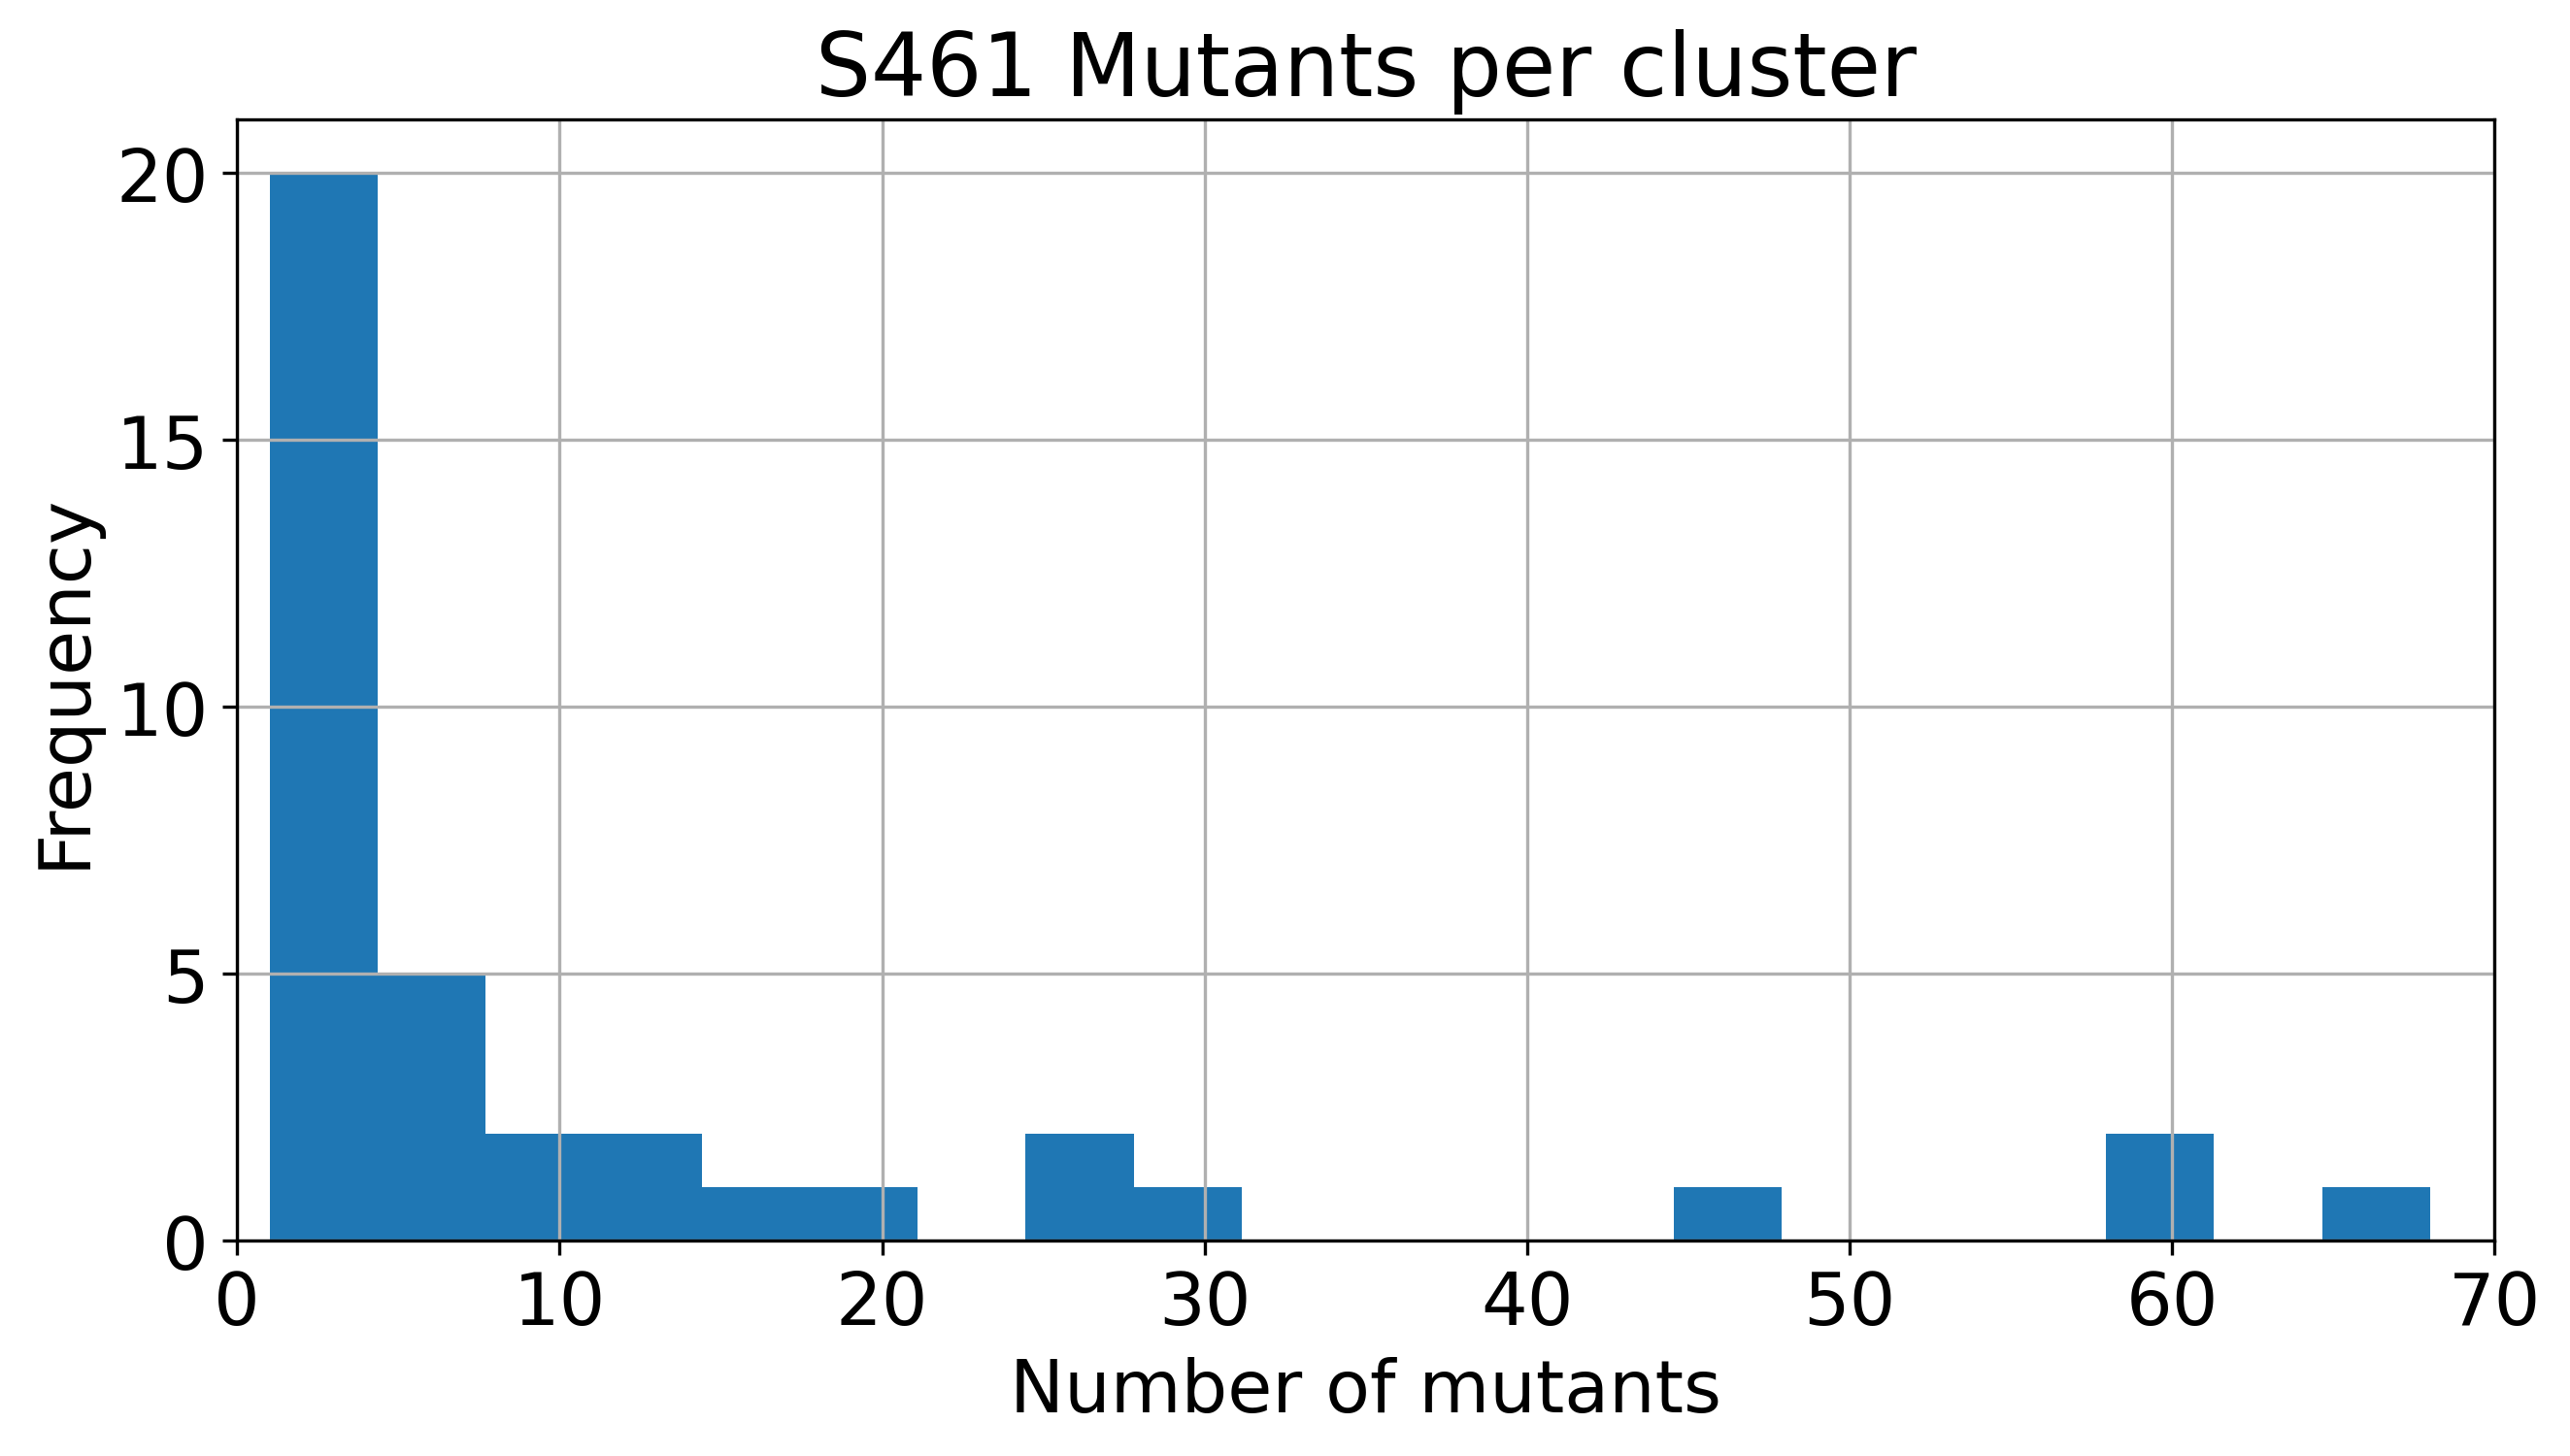

In [34]:
db_class = db
db_class = db_class.rename({'KORPMD_dir': 'KORPM_dir'}, axis=1)

print('Original unique mutations:', len(db_class))

evolutionary = ['tranception', 'msa_transformer', 'esm1v', 'msa', 'esm2', 'ankh']
structural = ['mpnn', 'mif', 'mifst', 'esmif', 'mutcomputex']
supervised = ['MAESTRO', 'ThermoNet', 'INPS', 'PremPS', 'mCSM', 'DUET', 'ACDC', 'I-Mutant3.0', 'SAAFEC', 'MuPro', 'q3421']
untrained = ['DDGun']
potential = ['KORPM', 'PopMusic', 'SDM']
biophysical = ['cartesian_ddg', 'FoldX', 'Evo', 'Cartddg']
transfer = ['stability-oracle']

original_pred_cols = db_class.columns[db_class.columns.str.contains('|'.join(evolutionary + structural + supervised + untrained + potential + biophysical + transfer))]
original_pred_cols = list(original_pred_cols.drop(['reduced_msa_file', 'full_msa_file', 'tranception_dms', 'msa_weights']))
original_pred_cols = [c for c in original_pred_cols if not 'runtime' in c]
original_pred_cols = [c for c in original_pred_cols if not 'cluster' in c]
original_pred_cols = [c for c in original_pred_cols if not 'overlaps' in c]
original_pred_cols = [c for c in original_pred_cols if not 'pll' in c]

ensemble_cols = [c for c in db_class.columns if 'pslm' in c]
print(ensemble_cols)

db_runtimes = db[[c for c in db.columns if 'runtime' in c]]

original_pred_cols_reduced = deepcopy(original_pred_cols)
for col in [f'esm1v_{i}_dir' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)
for col in [f'msa_{i}_dir' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)

print(original_pred_cols_reduced)

db_class = db_class[original_pred_cols + ensemble_cols + ['ddG_dir', 'cluster']]

db_class_rescaled = db_class.copy(deep=True)
db_class_rescaled[original_pred_cols] /= db_class_rescaled[original_pred_cols].std()

db_class['mpnn_rosetta_dir'] = db_class['cartesian_ddg_dir'] + db_class['mpnn_20_00_dir']
db_class['random_dir'] = np.random.normal(loc=db['ddG'].mean(), size=len(db_class))
db_class['ddG'] = db_class['ddG_dir']

db_class = db_class.drop([c+'_dir' for c in ['ACDCNND', 'FoldXD', 'DDGunD', 'CartddgD']], axis=1) #'PopMsD', 'TNetD'

print(f'Detected {len(db_class.loc[db["on_interface_dir"].astype(bool)])} interface mutations')

fig, axes = plt.subplots(1, figsize=(10, 5), dpi=300) 
db_class.groupby('cluster').count().iloc[:, 0].hist(bins=20, ax=axes)
#db_class.groupby('cluster').count().iloc[:, 0].hist(bins=800, ax=axes[1])
plt.xlim([0,70])
plt.title('S461 Mutants per cluster')
plt.xlabel('Number of mutants')
plt.ylabel('Frequency')

db_class

In [3]:
print((db_class.groupby('cluster').count().iloc[:, 0] >= 10).sum(), (db_class.groupby('cluster').count().iloc[:, 0] < 10).sum())

11 27


In [23]:
summ_ = analysis_utils.compute_stats(db_class.reset_index('uid2', drop=True), 
                                    stats=(), 
                                    measurements=['ddG'], grouper='cluster', n_classes=2, n_bootstraps=0, quiet=True)
summ_.to_csv('../data/extended/s461_extended.csv')

In [59]:
import importlib
importlib.reload(analysis_utils)

<module 'analysis_utils' from '/home/sareeves/PSLMs/analysis_notebooks/analysis_utils.py'>

In [60]:
table1 = summ_ #.loc[:,['n', 'MCC', 'auprc', 'spearman', 'weighted_ndcg', 'weighted_auprc', 'weighted_spearman']]
table = table1.reset_index()

table['model'] = table['model'].str[:-4]
for source, target in remap_names.items():
    table.loc[table['model']==source, 'model'] = target
#table['model'] = table['model'].map(remap_names)
table.loc[table['model'].isin(['Gaussian noise', 'ΔΔG label']), 'model_type'] = 'control'

remap_cols = {'auprc': 'AUPRC', 'spearman': 'Spearman\'s ρ', 'auppc': 'mean PPC', 'aumsc': 'mean MSC', 'weighted_ndcg': 'wNDCG', 'recall@k1.0': 'Recall @ k',
    'weighted_spearman': 'wρ', 'weighted_auprc': 'wAUPRC', 'tp': 'True Positives', 'sensitivity': 'Sensitivity', 'antisymmetry': 'Antisymmetry', 'bias': 'Bias',
    'net_stabilization': 'Net Stabilization', 'accuracy': 'Accuracy', 'pearson': 'Pearson', 'PPV': 'PPV'}
table = table.rename(remap_cols, axis=1)
#table = table[['direction', 'model_type', 'model', 'n', 'MCC', 'AUPRC', 'ρ', 'wNDCG', 'wAUPRC', 'wρ', 'mean_t1s', 'Net Stabilization',
#    'mean_stabilization', 'mean PPC', 'mean MSC', 'True Positives', 'Sensitivity', 'Accuracy', 'Pearson']]
table = table.rename({'model_type': 'Model Type', 'model': 'Model'}, axis=1)

#'auprc', 'spearman','net_stabilization', 'MCC', 'sensitivity', 'recall@k1.0'
#table = table[['Direction', 'Model Type', 'Model', 'n', 'Spearman\'s ρ', 'Sensitivity', 'PPV', 'Antisymmetry', 'Bias']]
table = table[['Model Type', 'Model', 'AUPRC', 'Spearman\'s ρ', 'Net Stabilization', 'MCC', 'Sensitivity', 'Recall @ k']]

table = table.loc[~table['Model'].str.contains('K1566')]
table = table.loc[~table['Model'].str.contains('_')]
table = table.dropna(subset='Model').set_index(['Model Type', 'Model']).astype(float).round(3).drop_duplicates()

t = table.sort_values('AUPRC', ascending=False).applymap(analysis_utils.format_fixed_total_digits)
t.to_csv('../data/extended/s461_formatted_extended.csv', encoding='utf-8-sig')
t

,,AUPRC,Spearman's ρ,Net Stabilization,MCC,Sensitivity,Recall @ k
Model Type,Model,,,,,,
control,ΔΔG label,1.00,1.00,37.0,1.00,1.00,1.00
structural,Rosetta/ProtMPNN,0.49,0.64,0.90,0.33,0.33,0.30
biophysical,Rosetta CartDDG,0.47,0.62,-4.67,0.31,0.38,0.30
transfer,Stability Oracle,0.42,0.65,-21.0,0.36,0.55,0.10
evolutionary,ESM-1V mean,0.39,0.43,-7.48,0.30,0.32,0.30
ensemble,Ensemble 4 Feats,0.39,0.58,-44.9,0.28,0.56,0.30
evolutionary,ESM-1V median,0.39,0.42,-7.01,0.31,0.32,0.30
potential,KORPM,0.39,0.54,-48.2,0.30,0.57,0.50
untrained,DDGun,0.39,0.57,-27.2,0.33,0.46,0.30


In [5]:
summ = analysis_utils.compute_stats(db_class.reset_index('uid2', drop=True), 
                                    stats=('n', 'accuracy', 'MCC', 'pred_positives', 'tp', 'auprc', 'spearman', 'ndcg', 'mean_t1s', 'mean_stabilization', 'net_stabilization', 'sensitivity', 'recall@k0.0', 'recall@k1.0', 'mean_reciprocal_rank'), 
                                    measurements=['ddG'], grouper='cluster', n_classes=2, n_bootstraps=100, quiet=True)
tmp1 = summ.reset_index()
tmp1.to_csv('../data/extended/s461_extended_bootstrapped.csv')

# ~ 5 minutes for 100 bootstraps

In [26]:
importlib.reload(analysis_utils)

<module 'analysis_utils' from '/home/sareeves/PSLMs/analysis_notebooks/analysis_utils.py'>

mpnn_rosetta
cartesian_ddg
stability-oracle
KORPM
DDGun3D
INPS3D
esm2_650M
mpnn_20_00
random


AUPRC Spearman's ρ  \
model_type   model                                             
unknown      ΔΔG label                1.0 ± 0.0    1.0 ± 0.0   
structural   Rosetta/ProtMPNN        0.5 ± 0.05  0.63 ± 0.05   
biophysical  Rosetta CartDDG        0.47 ± 0.06  0.61 ± 0.05   
transfer     Stability Oracle       0.43 ± 0.06  0.65 ± 0.05   
potential    KORPM_dir               0.4 ± 0.05  0.54 ± 0.06   
evolutionary ESM-1V mean             0.4 ± 0.05  0.43 ± 0.06   
ensemble     Ensemble 4 Feats        0.4 ± 0.05  0.59 ± 0.06   
             Ensemble 6 Feats        0.4 ± 0.06  0.62 ± 0.06   
evolutionary ESM-1V median           0.4 ± 0.05  0.42 ± 0.06   
ensemble     Ensemble 7 Feats        0.4 ± 0.06  0.62 ± 0.06   
structural   MIF                     0.4 ± 0.06  0.46 ± 0.08   
ensemble     Ensemble 5 Feats       0.39 ± 0.06  0.61 ± 0.06   
untrained    DDGun_dir              0.39 ± 0.05  0.56 ± 0.06   
ensemble     Ensemble 3 Feats       0.37 ± 0.05  0.55 ± 0.07   
supervised   INPS-Seq_dir           0.37 ± 0.06  0.53 ± 0.06   
potential    PopMusic_dir           0.37 ± 0.04  0.59 ± 0.05   
untrained    DDGun3D_dir            0.37 ± 0.05  0.57 ± 0.07   
transfer     ACDC-NN_dir            0.36 ± 0.05  0.55 ± 0.07   
supervised   MAESTRO_dir            0.35 ± 0.05  0.59 ± 0.05   
structural   MIF-ST                 0.35 ± 0.05  0.38 ± 0.08   
potential    SDM_dir                0.35 ± 0.05   0.5 ± 0.05   
structural   ESM-IF                 0.35 ± 0.06  0.41 ± 0.06   
evolutionary ESM-2 15B              0.34 ± 0.05  0.31 ± 0.08   
supervised   INPS3D_dir             0.34 ± 0.06  0.58 ± 0.05   
evolutionary ESM-2 150M             0.34 ± 0.04  0.39 ± 0.06   
supervised   PremPS_dir             0.34 ± 0.04   0.6 ± 0.06   
ensemble     Ensemble 2 Feats       0.34 ± 0.05  0.43 ± 0.08   
evolutionary ESM-2 650M             0.34 ± 0.04  0.44 ± 0.06   
structural   ProteinMPNN 0.2        0.33 ± 0.05  0.44 ± 0.07   
evolutionary Ankh                   0.32 ± 0.04  0.44 ± 0.06   
structural   ProteinMPNN 0.3        0.32 ± 0.05  0.45 ± 0.07   
transfer     ACDC-NN-Seq_dir        0.31 ± 0.04  0.52 ± 0.07   
supervised   DUET_dir               0.31 ± 0.04  0.55 ± 0.06   
evolutionary MSA-T mean             0.31 ± 0.05  0.27 ± 0.05   
structural   ProteinMPNN 0.1         0.3 ± 0.05   0.4 ± 0.07   
evolutionary ESM-2 3B                0.3 ± 0.05  0.36 ± 0.06   
             Tranception             0.3 ± 0.06  0.27 ± 0.07   
             MSA-T median            0.3 ± 0.05  0.26 ± 0.06   
supervised   ThermoNet_dir          0.29 ± 0.05  0.47 ± 0.07   
             I-Mutant3.0_dir        0.29 ± 0.04  0.46 ± 0.07   
             SAAFEC-Seq_dir         0.29 ± 0.04  0.46 ± 0.07   
             I-Mutant3.0-Seq_dir    0.28 ± 0.06  0.43 ± 0.08   
evolutionary Tranception (reduced)  0.28 ± 0.06  0.27 ± 0.07   
biophysical  EvoD_dir               0.28 ± 0.04  0.45 ± 0.07   
supervised   mCSM_dir               0.27 ± 0.03   0.5 ± 0.07   
             MuPro_dir              0.27 ± 0.04  0.35 ± 0.09   
structural   MutComputeX            0.26 ± 0.05  0.37 ± 0.06   
biophysical  FoldX_dir              0.25 ± 0.04  0.36 ± 0.09   
unknown      Gaussian Noise         0.18 ± 0.03  0.04 ± 0.03   
NaN          Avg. Dev.                    0.05         0.06    

                                   Net Stabilization          MCC  \
model_type   model                                                  
unknown      ΔΔG label                  36.88 ± 8.95    1.0 ± 0.0   
structural   Rosetta/ProtMPNN           -0.11 ± 8.02  0.32 ± 0.06   
biophysical  Rosetta CartDDG            -5.35 ± 8.87   0.3 ± 0.05   
transfer     Stability Oracle          -20.6 ± 11.35  0.36 ± 0.06   
potential    KORPM_dir                 -47.8 ± 19.75   0.3 ± 0.04   
evolutionary ESM-1V mean                 -6.95 ± 8.4   0.3 ± 0.04   
ensemble     Ensemble 4 Feats         -45.58 ± 19.04  0.28 ± 0.05   
             Ensemble 6 Feats         -37.88 ± 16.51  0.29 ± 0.06   
evolutionary ESM-1V med

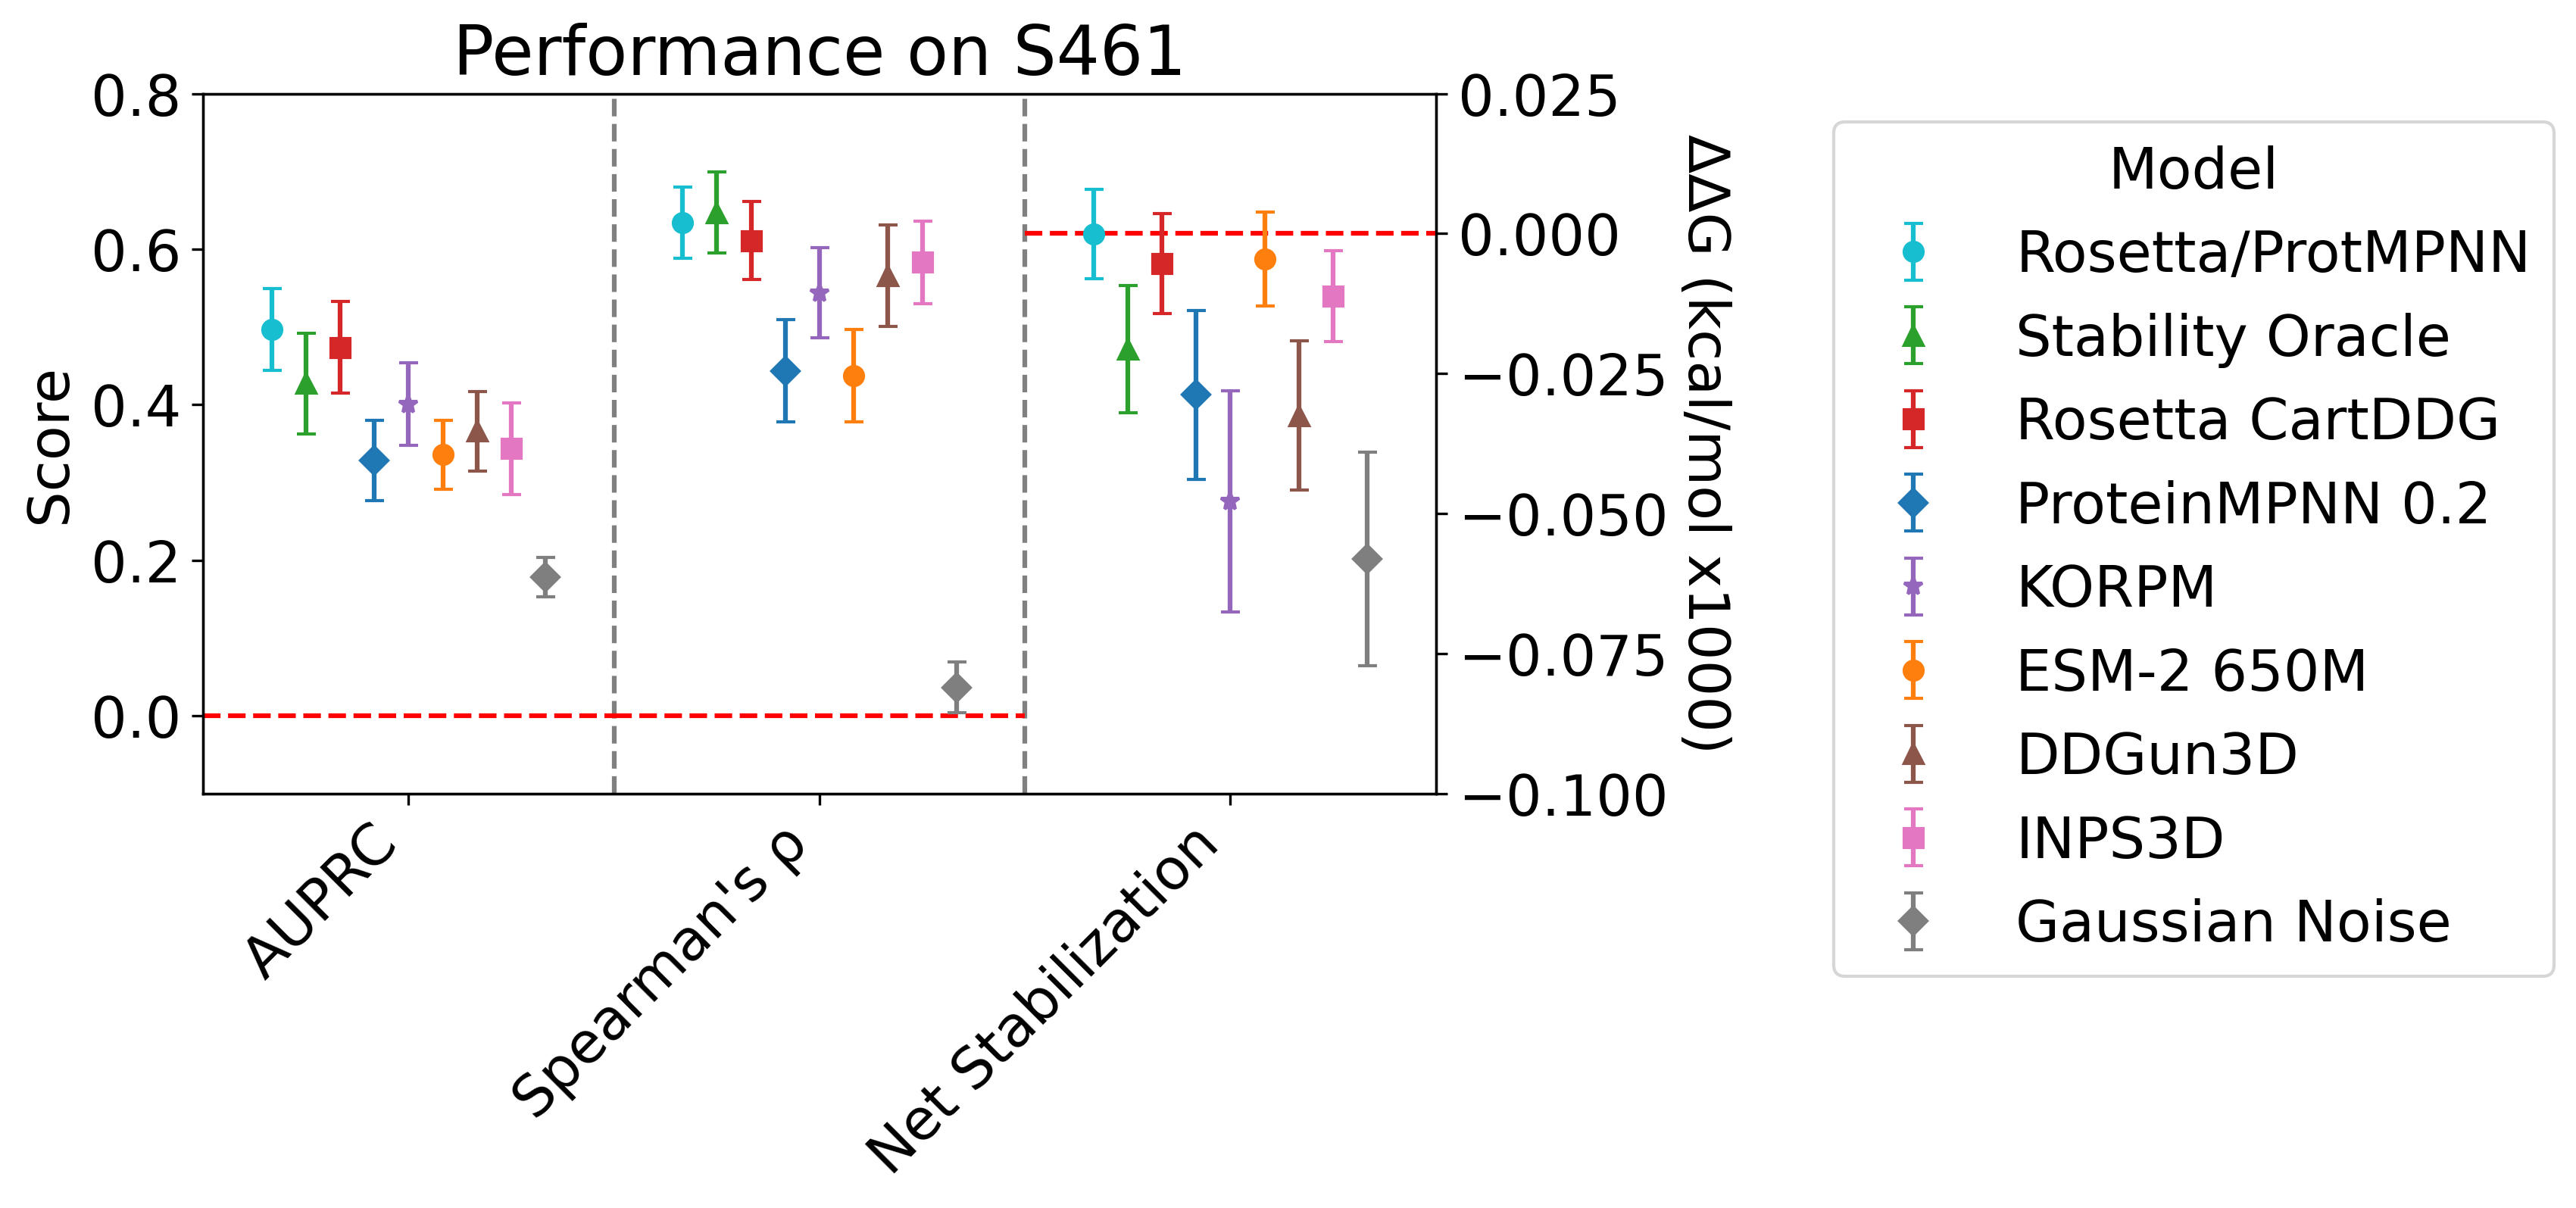

In [29]:
s2 = tmp1.sort_values('auprc_mean', ascending=False).dropna(how='all', axis=1).reset_index()
s3 = s2.loc[s2['model'].isin(original_pred_cols_reduced + [
            'random_dir', 
            'ddG_dir', 
            'K1566_pslm_rfa_2_dir', 
            'K1566_pslm_rfa_3_dir', 
            'K1566_pslm_rfa_4_dir',
            'K1566_pslm_rfa_5_dir',
            'K1566_pslm_rfa_6_dir',
            'K1566_pslm_rfa_7_dir',
            'mpnn_rosetta_dir'])
            ].drop('measurement', axis=1)
plot_cols = ['auprc', 'spearman','net_stabilization']
plot_models = ['mpnn_rosetta', 'stability-oracle', 'cartesian_ddg', 'mpnn_20_00', 'KORPM', 'esm2_650M', 'DDGun3D', 'INPS3D', 'random']
plot_title = 'S461'
y_lim = (-0.1, 0.8)
right_y_lim = (-.1, .025)
table_cols = ['auprc', 'spearman','net_stabilization', 'MCC', 'sensitivity', 'recall@k1.0']
saveloc = '../data/extended/s461_extended_bootstrapped_formatted.csv'
analysis_utils.bootstrap_table(s3, 
                plot_cols,
                plot_models, 
                plot_title,
                y_lim,
                right_y_lim,
                table_cols, 
                var_cols='net_stabilization', 
                sort_col='auprc',
                saveloc=saveloc)

In [38]:
zs_feats = ['delta_kdh', 'delta_vol', 'rel_ASA']

db_ens = db_class.copy(deep=True).reset_index().set_index('uid2').reset_index(drop=True).set_index('uid')#.join(db_feats_2.drop(['SOL_ACC_dir', 'SOL_ACC_inv'], axis=1))
#db_ens = db_ens.rename({'ddG_dir': 'ddG'}, axis=1) 
#models = original_pred_cols_reduced + [c + '_dir' for c in zs_feats]
models = list(db_class.columns) #+ [z+'_dir' for z in zs_feats]
models.remove('ddG_dir')
models = [c for c in models if not 'q3421' in c]
#models.remove('ddG_dir')

#for zs in zs_feats:
#    db_ens[zs+'_dir'] = db_ens[zs]

print(len(db_ens))
db_ens['random_dir'] = np.random.normal(size=len(db_ens)) - 0.5
#db_ens['random_inv'] = np.random.normal(size=len(db_ens)) - 0.5
#db_ens = db_ens.drop(['KORPMD_dir', 'CartddgD_dir', 'FoldXD_dir', 'EvoD_dir', 'Dyna2D_dir', 'PopMsD_dir', 'DDGunD_dir', 'TNetD_dir', 'ACDCNND_dir'], axis=1)
dfm = db_ens.copy(deep=True)

461


In [39]:
weights = [1, 0.5, 0.2]
#weights2 = [0.8, 0.3]

all_cols = []

tmp = []
for model1 in models:
    for model2 in models:
        if model1[-4:] == model2[-4:] and model1 != model2: #(model1.split('_')[0] != model2.split('_')[0]) and (model1[:4] != model2[:4]) and
            for weight in weights:
                tmp.append(pd.Series(dfm[model1]/dfm[model1].std() + dfm[model2]/dfm[model2].std() * weight, name=f'{model1} + {model2} * {weight}'))
                all_cols.append(f'{model1} + {model2} * {weight}')
                #for model3 in models:
                #    if model2 != model3 and model1 != model3:
                #        for weight2 in weights2:
                #            tmp.append(pd.Series(dfm[model1] + dfm[model2] * weight + dfm[model3] * weight2, name=f'{model1} + {model2} * {weight} + {model3} * {weight2}'))
                #            all_cols.append(f'{model1} + {model2} * {weight} + {model3} * {weight2}')

dfm = pd.concat([dfm] + tmp, axis=1)
dfm = dfm.join(db_runtimes)
#dfm.to_csv(os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_preds.csv'))
dfm.columns

Index(['KORPM_dir', 'EvoD_dir', 'MAESTRO_dir', 'FoldX_dir', 'PremPS_dir',
       'mCSM_dir', 'SDM_dir', 'DUET_dir', 'I-Mutant3.0_dir',
       'I-Mutant3.0-Seq_dir',
       ...
       'runtime_esm1v_2_dir', 'runtime_esm1v_3_dir', 'runtime_esm1v_4_dir',
       'runtime_esm1v_5_dir', 'runtime_esm1v_median_dir',
       'runtime_esm1v_mean_dir', 'runtime_tranception_dir',
       'runtime_tranception_weights_dir', 'runtime_korpm_dir',
       'runtime_cartesian_ddg_dir'],
      dtype='object', length=12749)

In [40]:
def get_summary_df(db_complete, cols=None, saveloc=os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_results.csv'), stats=(), stacked=False):

    assert os.path.exists(os.path.dirname(saveloc))
    assert not os.path.exists(saveloc)

    df_summ = analysis_utils.compute_stats(db_complete, stats=(), grouper='cluster', measurements=['ddG']).reset_index().set_index(['measurement', 'model'])#.join(df_reg) #.drop('n_total', axis=1))
    df_summ = df_summ.reset_index().rename({'index': 'model'}, axis=1).set_index(['measurement', 'model_type', 'model', 'class'])
    df_summ = df_summ.sort_index(level=1).sort_index(level=0)#.drop_duplicates()
    df_summ.to_csv(saveloc)
    return df_summ

In [41]:
import importlib
importlib.reload(analysis_utils)
# takes a long time to compute and has already been done
#d1 = get_summary_df(dfm, saveloc=os.path.join(path, 'data', 'pairwise', 'pairwise_s461_combinations_3_weights.csv'), stats=()) 

d1 = pd.read_csv(os.path.join(path, 'data', 'pairwise', 'pairwise_s461_combinations_3_weights.csv')).set_index(['measurement', 'model_type', 'model', 'class'])
d1 = d1.reset_index().replace(to_replace='KORPMD', value='KORPM', regex=True).set_index(['measurement', 'model', 'model_type', 'class'])

['ACDC-NN_dir', 'DDGun3D_dir', 'DUET_dir', 'Dynamut2_dir', 'FoldX_dir', 'Evo_dir', 'I-Mutant3.0_dir', 'INPS3D_dir', 'MAESTRO_dir', 'MUpro_dir', 'PopMusic_dir', 'PremPS_dir', 'ThermoNet_dir', 'SAAFEC-Seq_dir', 'SDM_dir', 'mCSM_dir', 'cartesian_ddg_dir', 'esm1v_mean_dir', 'esm2_650M_dir', 'ankh_dir', 'msa_transformer_mean_dir', 'tranception_weights_dir', 'esmif_multimer_dir', 'KORPM_dir', 'mpnn_20_00_dir', 'mif_dir', 'mifst_dir', 'stability-oracle_dir', 'mutcomputex_dir']
461
0.12048281269827099
['Stability Oracle', 'Rosetta CartDDG', 'PremPS_dir', 'PopMusic_dir', 'MAESTRO_dir', 'INPS3D_dir', 'DDGun3D_dir', 'DUET_dir', 'ACDC-NN_dir', 'KORPM_dir', 'mCSM_dir', 'SDM_dir', 'ThermoNet_dir', 'I-Mutant3.0_dir', 'SAAFEC-Seq_dir', 'MIF', 'Ankh', 'ESM-2 650M', 'ProteinMPNN 0.2', 'ESM-1V mean', 'ESM-IF', 'MIF-ST', 'MutComputeX', 'FoldX_dir', 'Tranception', 'MSA-T mean']


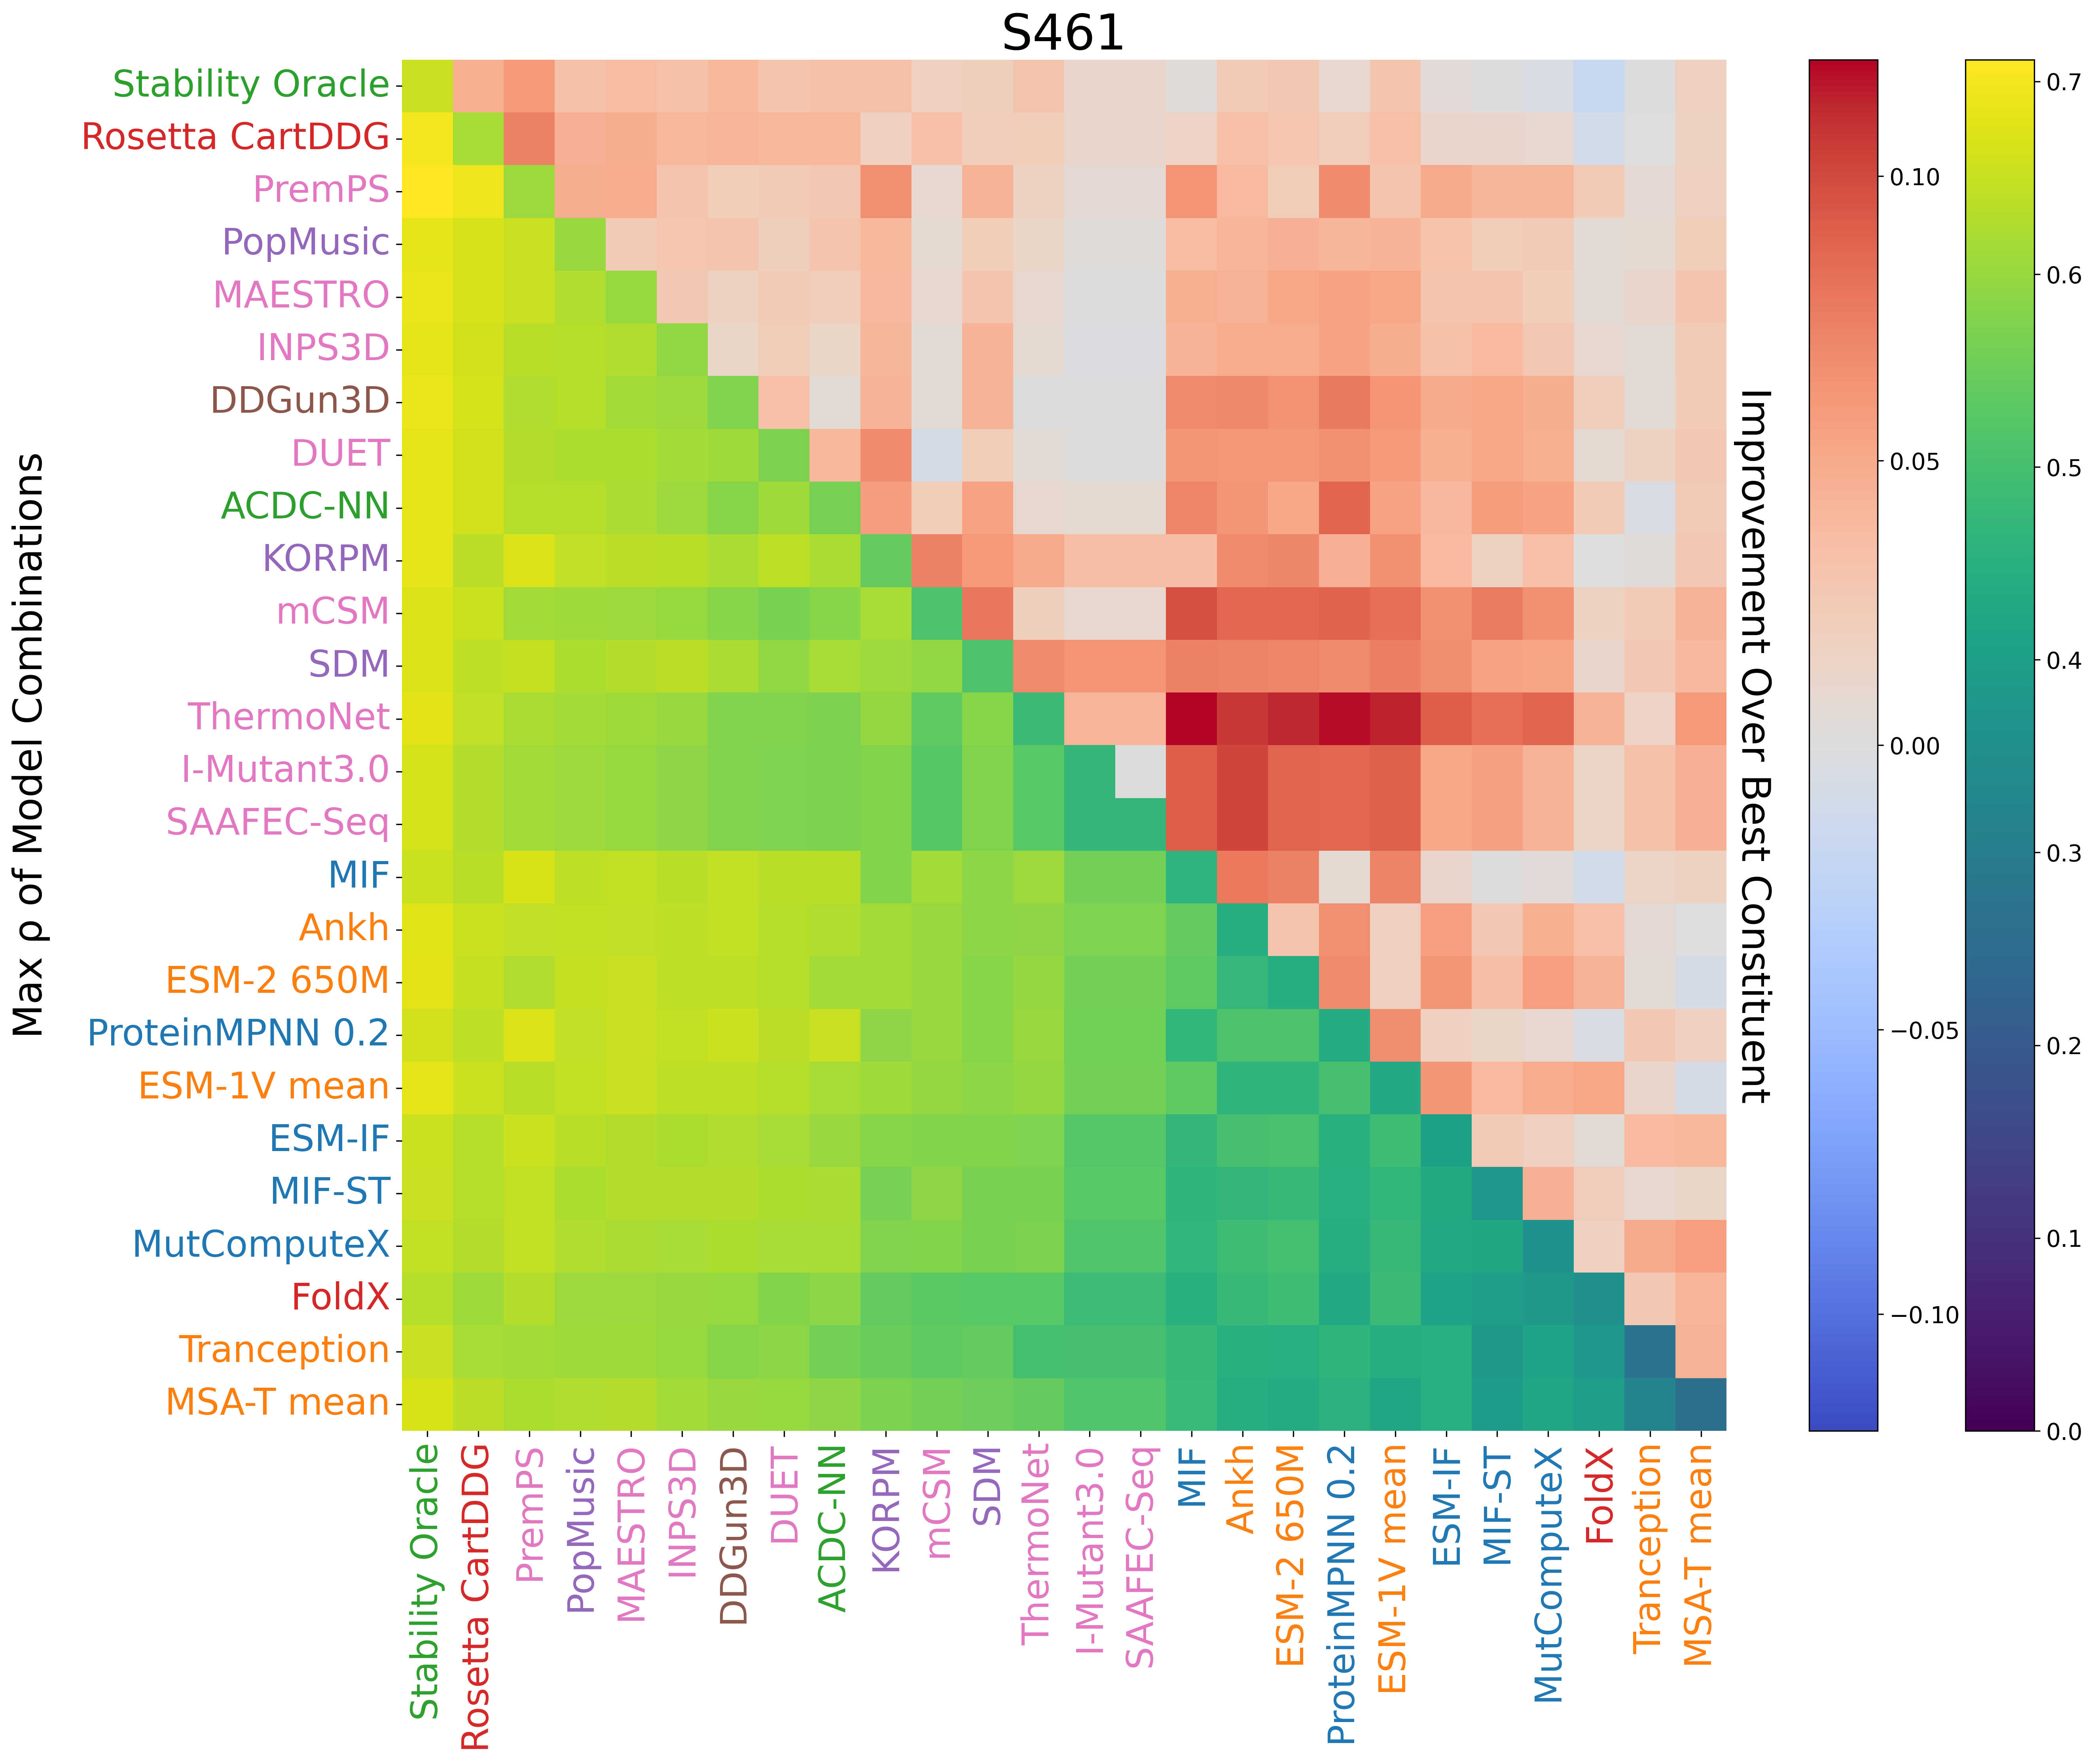

,Base model,Added Model,Weight,Spearman's rho,Model Correlation,CPU time (s),GPU time (s)
Rank,,,,,,,
1,Stability Oracle,PremPS,0.5,0.71,0.55,-0.0,-0.00
2,Stability Oracle,Rosetta CartDDG,0.5,0.70,0.64,368118.0,-0.00
3,PremPS,Rosetta CartDDG,1.0,0.69,0.53,368118.0,-0.00
4,Stability Oracle,DDGun3D,0.5,0.69,0.60,-0.0,-0.00
5,Stability Oracle,MAESTRO,0.5,0.69,0.64,-0.0,-0.00
6,Stability Oracle,PopMusic,0.5,0.68,0.68,-0.0,-0.00
7,Stability Oracle,ACDC-NN,0.5,0.68,0.61,-0.0,-0.00
8,Stability Oracle,KORPM,0.5,0.68,0.58,-0.0,-0.00
9,Stability Oracle,INPS3D,0.5,0.68,0.64,-0.0,-0.00


In [45]:
subset = [#'ACDC-NN-Seq', 
        'ACDC-NN', 
        #'DDGun'
        'DDGun3D',
        'DUET',
        'Dynamut2',
        'FoldX',
        'Evo',
        'I-Mutant3.0',
        #'I-Mutant3.0-Seq',
        #'INPS-Seq',
        'INPS3D',
        'MAESTRO',
        'MUpro',
        'PopMusic',
        'PremPS',
        'ThermoNet',
        'SAAFEC-Seq',
        'SDM',
        'mCSM',
        'cartesian_ddg',
        'esm1v_mean',
        'esm2_650M',
        'ankh',
        'msa_transformer_mean',
        'tranception_weights',
        'esmif_multimer',
        'KORPM',
        'mpnn_20_00',
        'mif',
        'mifst',
        'stability-oracle',
        'mutcomputex'
        #'SOL_ACC',
        #'delta_kdh',
        #'delta_vol',
        #'abs_ASA',
        ]

subset = [c+'_dir' for c in subset]

print(subset)

#custom_colors = dict(zip([key+'_dir' for key in custom_colors.keys()], list(custom_colors.values())))
#print(custom_colors)

measurement = 'ddG'
statistic = 'spearman'

db_ddg = db[['ddG']]
db_ddg_ = db_ddg.copy(deep=True)
db_ddg_ = db_ddg_.rename({'ddG_dir': 'ddG'}, axis=1).reset_index('uid2', drop=True)
d3 = d1.copy(deep=True)

#dfm['code'] = dfm.index.str[:4]

stat_df_, delta_df = analysis_utils.model_combinations_heatmap(d3, dfm.fillna(0), db_ddg_, statistic, measurement, threshold=0, subset=subset, n_bootstraps=0, grouper=None, upper='delta', annot=False, title='S461')
#stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfm, statistic, direction, upper, threshold=None, custom_colors=custom_colors)
stat_df = stat_df_
stat_df = stat_df.drop_duplicates(subset=[f'{statistic}', 'runtime_cpu', 'runtime_gpu']).reset_index(drop=True).sort_values(f'{statistic}', ascending=False).reset_index(drop=True).reset_index()
stat_df['model1'] = stat_df['model1'].map(lambda x: remap_names_2.get(x, x[:-4]))
stat_df['model2'] = stat_df['model2'].map(lambda x: remap_names_2.get(x, x[:-4]))

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

461
42.424
['Tranception', 'MSA-T mean', 'Rosetta CartDDG', 'ESM-2 650M', 'ESM-1V mean', 'PremPS_dir', 'MIF-ST', 'Ankh', 'I-Mutant3.0_dir', 'SAAFEC-Seq_dir', 'INPS3D_dir', 'PopMusic_dir', 'ESM-IF', 'mCSM_dir', 'Stability Oracle', 'DUET_dir', 'MIF', 'MAESTRO_dir', 'ACDC-NN_dir', 'ProteinMPNN 0.2', 'DDGun3D_dir', 'MutComputeX', 'KORPM_dir', 'SDM_dir', 'ThermoNet_dir', 'FoldX_dir']


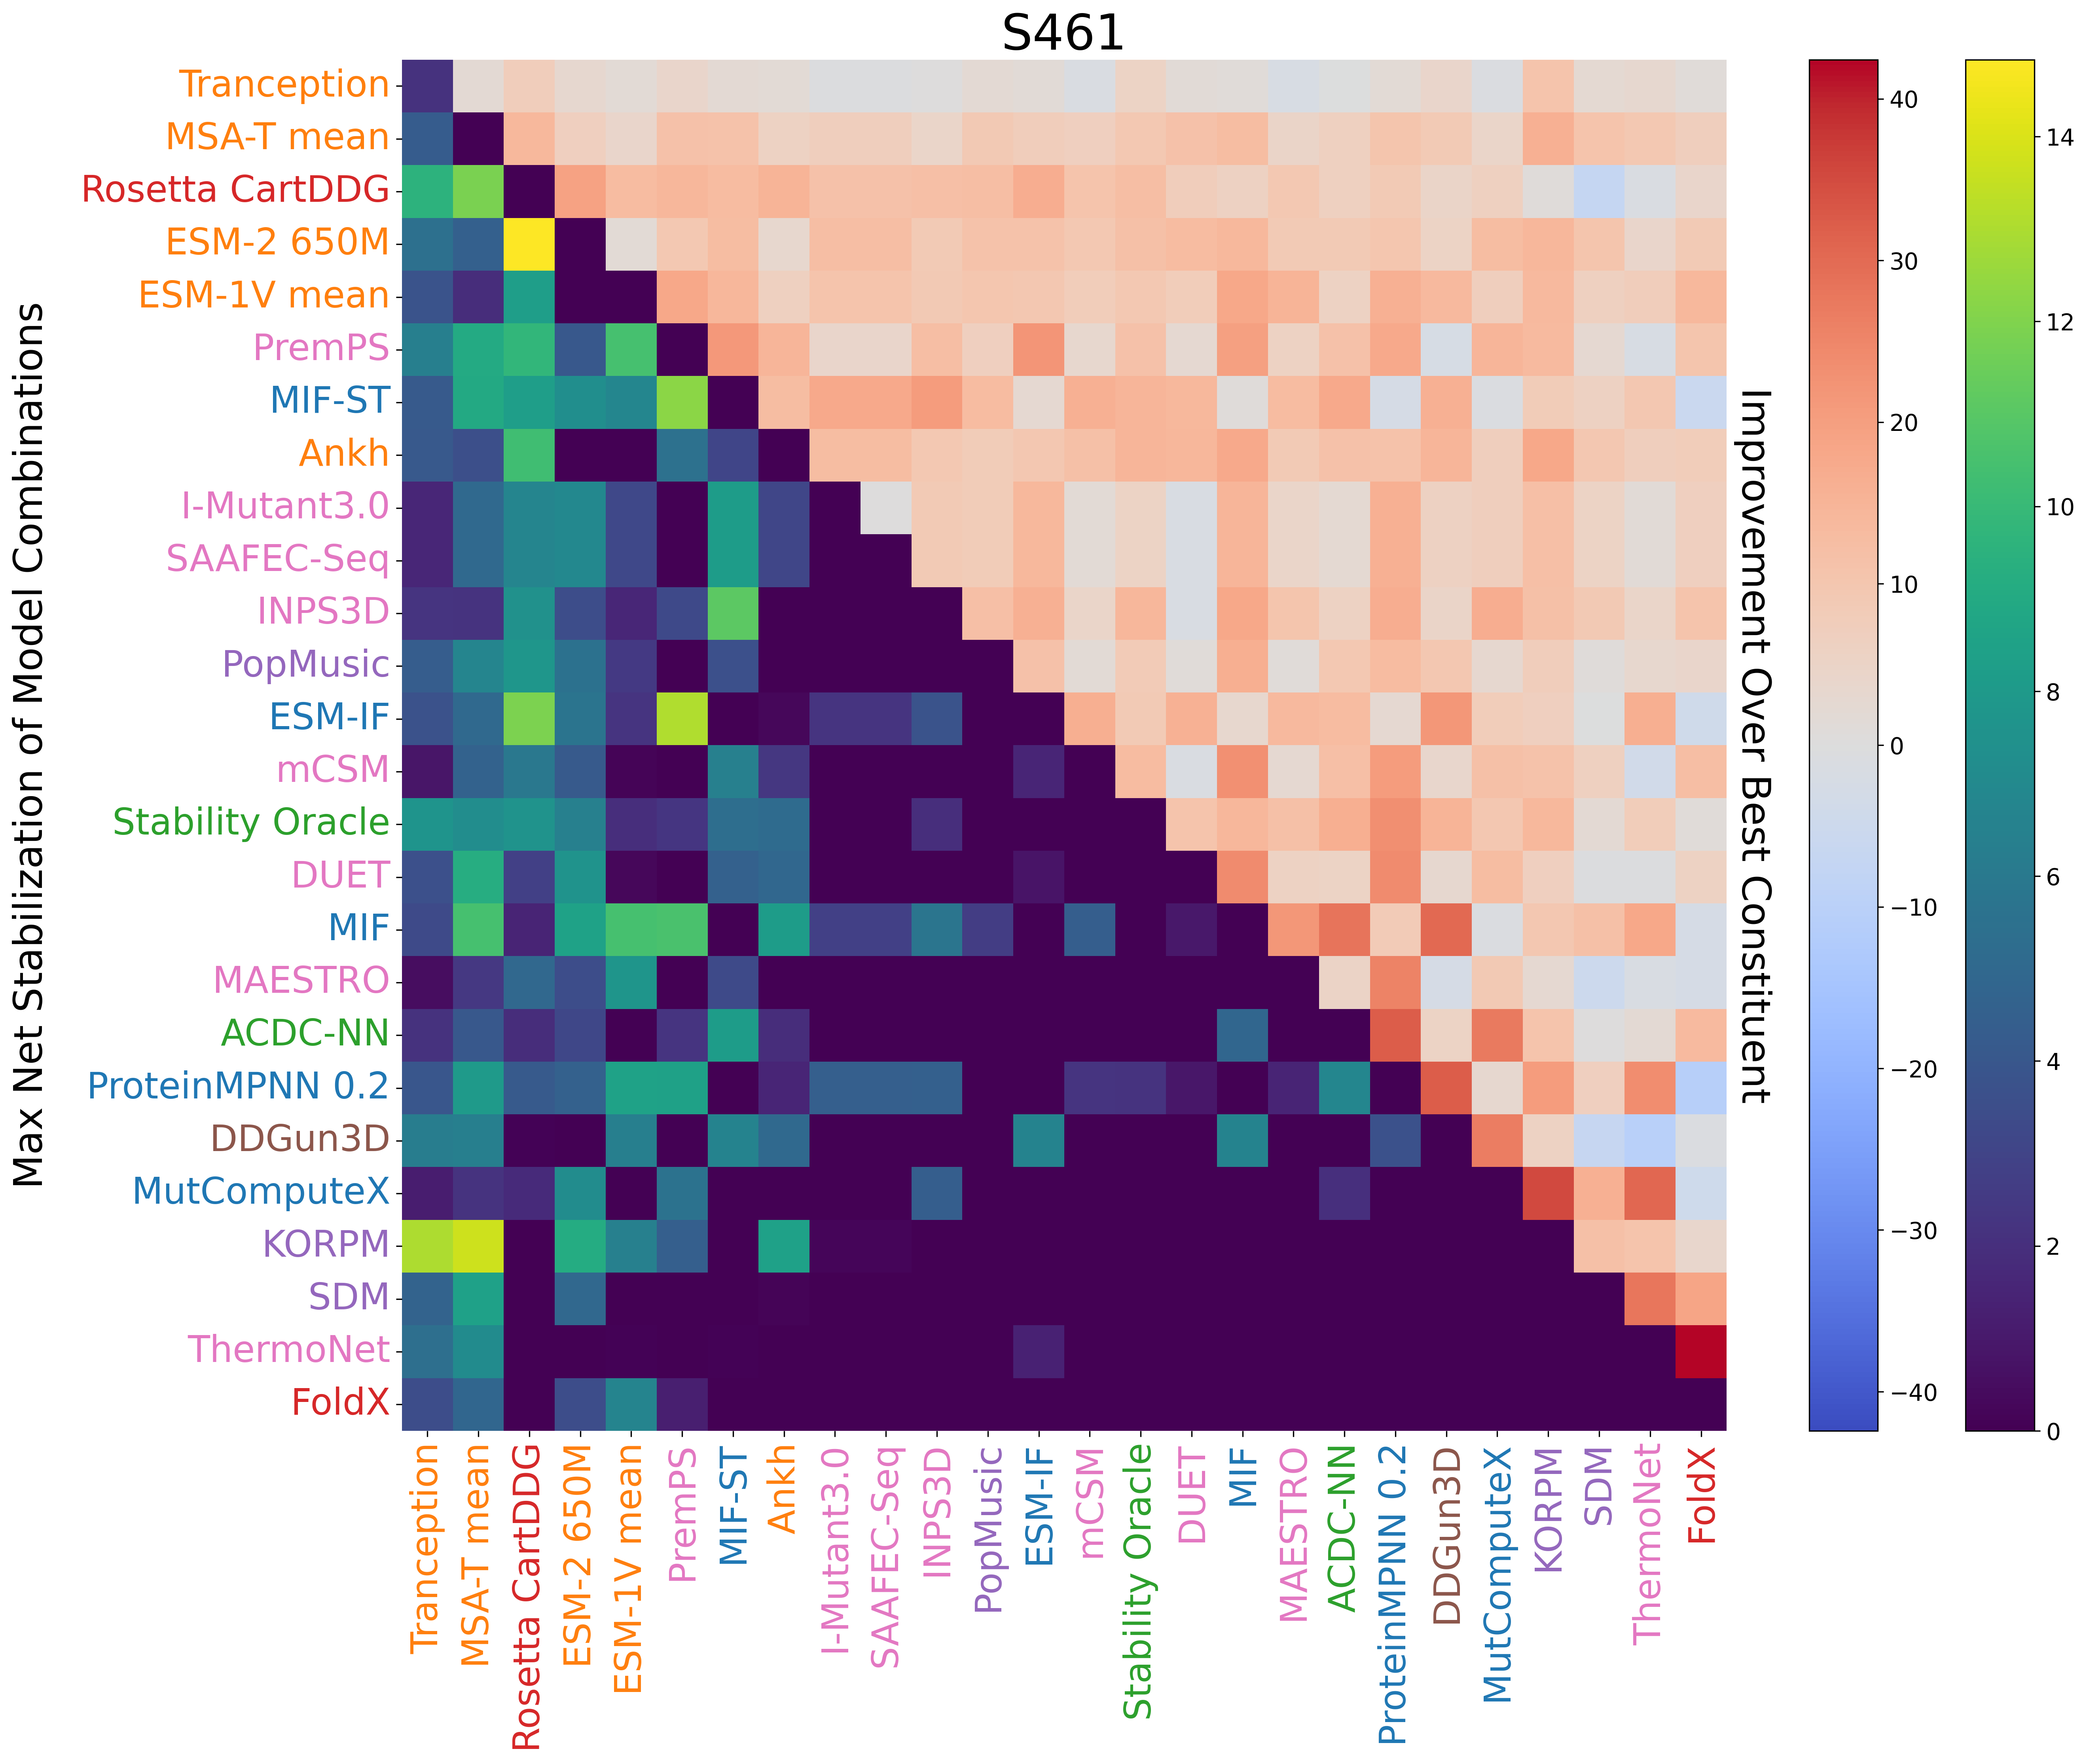

,Base model,Added Model,Weight,Net Stabilization,Model Correlation,CPU time (s),GPU time (s)
Rank,,,,,,,
0,Rosetta CartDDG,ESM-2 650M,0.5,14.83,0.37,368118.0,34.21
1,KORPM,MSA-T mean,1.0,13.71,0.18,-0.0,4313.81
2,PremPS,ESM-IF,1.0,13.05,0.29,-0.0,78.45
3,Tranception,KORPM,0.5,13.01,0.32,-0.0,22597.81
4,PremPS,MIF-ST,1.0,12.24,0.26,-0.0,14.20
5,ESM-IF,Rosetta CartDDG,0.5,11.90,0.46,368118.0,78.45
6,Rosetta CartDDG,MSA-T mean,0.2,11.85,0.20,368118.0,4313.81
7,MIF-ST,INPS3D,0.5,11.08,0.32,-0.0,14.20
8,PremPS,MIF,1.0,10.57,0.30,-0.0,3.69


In [46]:
measurement = 'ddG'
statistic = 'net_stabilization'

db_ddg_ = db_ddg.copy(deep=True)
db_ddg_ = db_ddg_.rename({'ddG_dir': 'ddG'}, axis=1).reset_index('uid2', drop=True)
d3 = d1.copy(deep=True)

#dfm['code'] = dfm.index.str[:4]

stat_df_, delta_df = analysis_utils.model_combinations_heatmap(d3, dfm.fillna(0), db_ddg_, statistic, measurement, threshold=0, subset=subset, n_bootstraps=0, grouper=None, upper='delta', annot=False, title='S461')
#stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfm, statistic, direction, upper, threshold=None, custom_colors=custom_colors)
stat_df = stat_df_
stat_df = stat_df.drop_duplicates(subset=[f'{statistic}', 'runtime_cpu', 'runtime_gpu']).reset_index(drop=True).sort_values(f'{statistic}', ascending=False).reset_index(drop=True).reset_index()
stat_df['model1'] = stat_df['model1'].map(lambda x: remap_names_2.get(x, x[:-4]))
stat_df['model2'] = stat_df['model2'].map(lambda x: remap_names_2.get(x, x[:-4]))

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

461
0.1287993520062512
['Rosetta CartDDG', 'Stability Oracle', 'ESM-1V mean', 'KORPM_dir', 'MIF', 'DDGun3D_dir', 'PopMusic_dir', 'ACDC-NN_dir', 'MAESTRO_dir', 'SDM_dir', 'ESM-IF', 'MIF-ST', 'PremPS_dir', 'INPS3D_dir', 'ESM-2 650M', 'ProteinMPNN 0.2', 'Ankh', 'DUET_dir', 'MSA-T mean', 'Tranception', 'ThermoNet_dir', 'SAAFEC-Seq_dir', 'I-Mutant3.0_dir', 'mCSM_dir', 'MutComputeX', 'FoldX_dir']


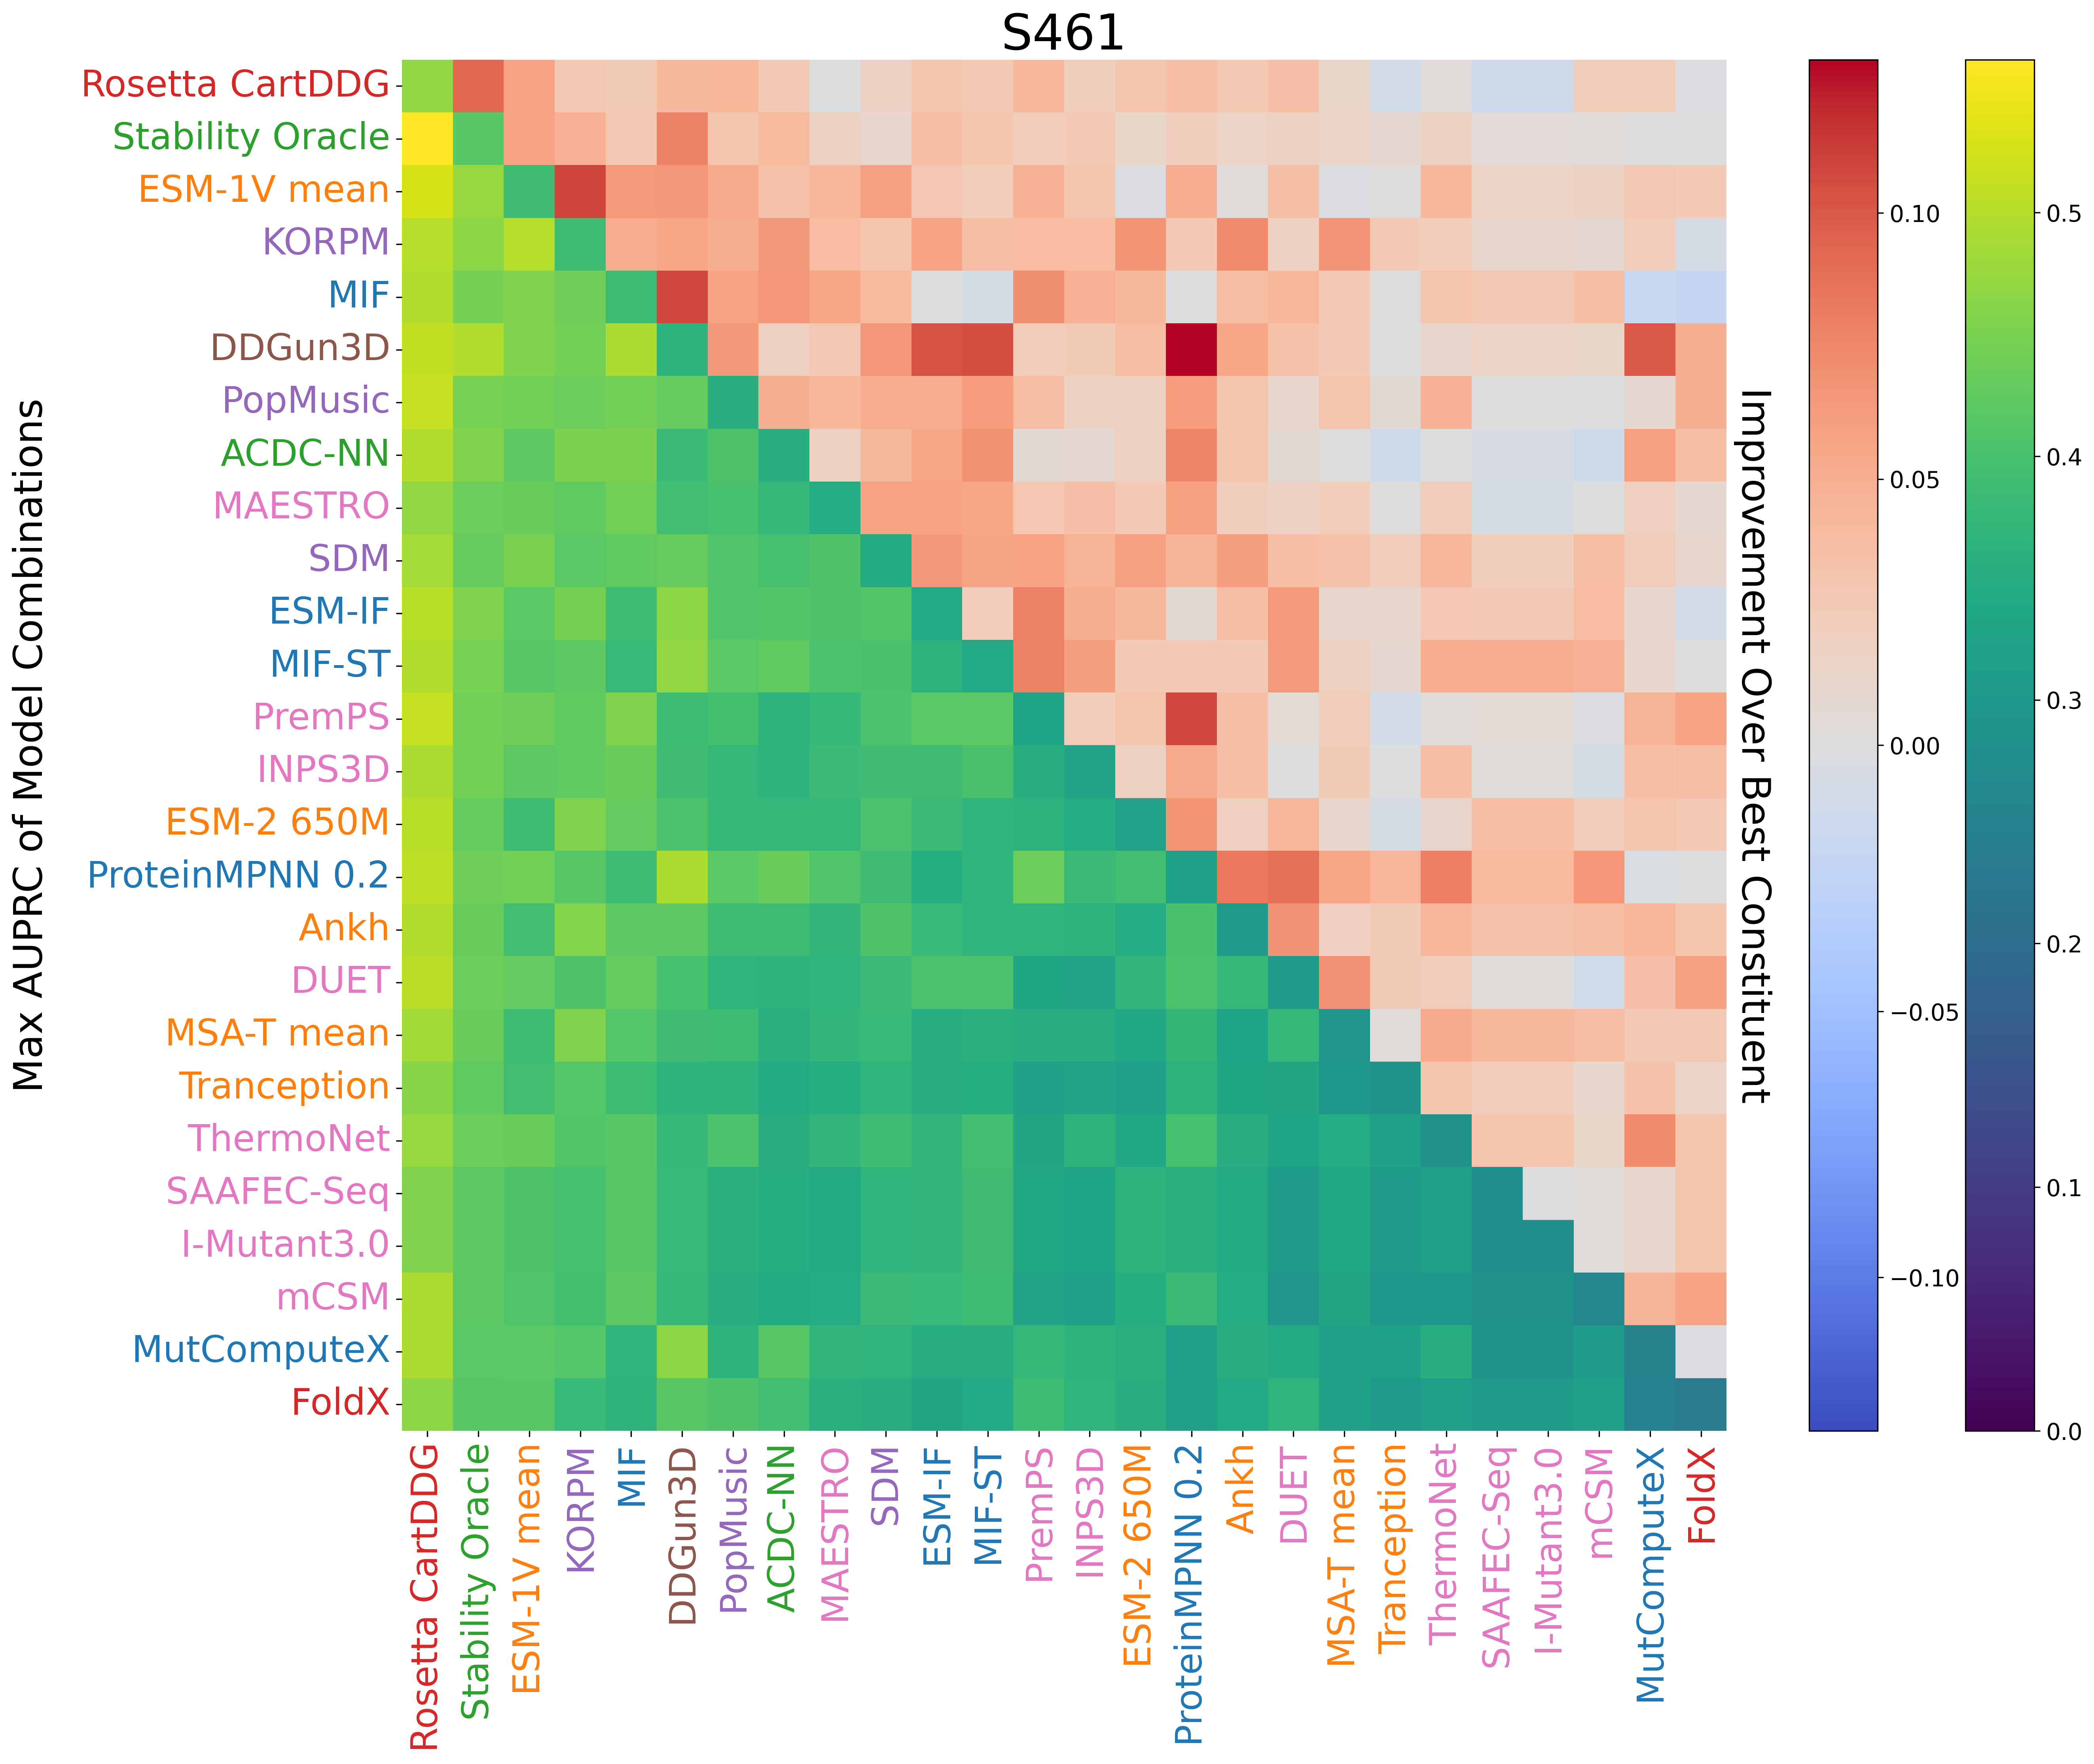

,Base model,Added Model,Weight,AUPRC,Model Correlation,CPU time (s),GPU time (s)
Rank,,,,,,,
1,Rosetta CartDDG,Stability Oracle,1.0,0.56,0.64,368118.0,-0.00
2,Rosetta CartDDG,ESM-1V mean,0.5,0.53,0.36,368118.0,592.95
3,Rosetta CartDDG,PopMusic,0.5,0.51,0.66,368118.0,-0.00
4,Rosetta CartDDG,PremPS,0.5,0.51,0.53,368118.0,-0.00
5,DDGun3D,Rosetta CartDDG,1.0,0.51,0.64,368118.0,-0.00
6,Rosetta CartDDG,ProteinMPNN 0.2,0.2,0.51,0.44,368118.0,4.64
7,Rosetta CartDDG,DUET,0.5,0.51,0.58,368118.0,-0.00
8,Rosetta CartDDG,ESM-2 650M,0.2,0.50,0.37,368118.0,34.21
9,Rosetta CartDDG,ESM-IF,0.5,0.50,0.46,368118.0,78.45


In [47]:
measurement = 'ddG'
statistic = 'auprc'

db_ddg_ = db_ddg.copy(deep=True)
db_ddg_ = db_ddg_.rename({'ddG_dir': 'ddG'}, axis=1).reset_index('uid2', drop=True)
d3 = d1.copy(deep=True)

#dfm['code'] = dfm.index.str[:4]

stat_df_, delta_df = analysis_utils.model_combinations_heatmap(d3, dfm.fillna(0), db_ddg_, statistic, measurement, threshold=0, subset=subset, n_bootstraps=0, grouper=None, upper='delta', annot=False, title='S461')
#stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfm, statistic, direction, upper, threshold=None, custom_colors=custom_colors)
stat_df = stat_df_
stat_df = stat_df.drop_duplicates(subset=[f'{statistic}', 'runtime_cpu', 'runtime_gpu']).reset_index(drop=True).sort_values(f'{statistic}', ascending=False).reset_index(drop=True).reset_index()
stat_df['model1'] = stat_df['model1'].map(lambda x: remap_names_2.get(x, x[:-4]))
stat_df['model2'] = stat_df['model2'].map(lambda x: remap_names_2.get(x, x[:-4]))

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

In [ ]:
supp = d1.xs('ddG')[['auprc', 'mean_stabilization', 'net_stabilization', 'weighted_ndcg', 'weighted_spearman', 'auppc', 'aumsc']].reset_index().drop(['model_type', 'class'], axis=1)#.set_index('model')
selection = ['INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
             'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'ThermoNet', 'mCSM']
selection = [s+'_dir' for s in selection]
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='dir')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='dir')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='dir')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

28


,Model 1,Model 2,Weight 2,wNDCG,AUPPC,Net Stabilization
232,cartesian_ddg_dir,esm1v_mean_dir,1.0,0.806753,0.044840,8.283
189,PremPS_dir,cartesian_ddg_dir,1.0,0.805029,0.045085,9.770
233,esmif_multimer_dir,cartesian_ddg_dir,0.5,0.796657,0.039577,11.904
97,FoldX_dir,esm1v_mean_dir,1.0,0.793330,0.042792,6.688
213,esm1v_mean_dir,SDM_dir,0.5,0.789572,0.046307,-0.945
62,mifst_dir,DDGun_dir,0.5,0.786953,0.047206,7.221
63,DDGun_dir,mpnn_20_00_dir,1.0,0.778439,0.049757,0.549
41,DDGun3D_dir,mifst_dir,1.0,0.778011,0.043912,6.607
217,SDM_dir,mifst_dir,1.0,0.777822,0.041874,-3.536
236,cartesian_ddg_dir,mifst_dir,0.5,0.777185,0.036767,8.260
